<a href="https://colab.research.google.com/github/joaoholandaa/criptomoeda-bitcoin/blob/main/bitcoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Criptomoeda-Bitcoin <br>**

In [1]:
# Mercado financeiro B3
!pip install yfinance --upgrade --no-cache-dir

In [2]:
# Pacotes
# Bibliotecas de "modelagem de dados"
import pandas as pd
import numpy as np
import pandas_datareader.data as web

# Análises gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# Análises gráficas ( alto nível )
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Data
import datetime

# Yahoo Finance
import yfinance as yf

# Args personalizados
yf.pdr_override()

# Avisos
import warnings
warnings.filterwarnings('ignore')

### **API Yahoo Finance**
O yfinance oferece uma maneira segmentada e Pythonic de baixar dados de mercado do "Yahoo!" finanças.

In [3]:
# Especificar o símbolo de ação e o período de tempo desejado
simbolo = 'BTC-USD'

# Primeira opção
inicio = '2021-11-06'
fim = '2023-11-06'

# Segunda opção
periodo = '6mo'

# Coletando dados
dados = web.get_data_yahoo(simbolo, period=periodo)

# Verificando
dados.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-26,26047.234375,26107.384766,25983.878906,26008.462891,26008.462891,6034817316
2023-08-27,26008.242188,26165.373047,25965.097656,26089.693359,26089.693359,6913768611
2023-08-28,26089.615234,26198.578125,25880.599609,26106.150391,26106.150391,11002805166
2023-08-29,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712
2023-08-30,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235


In [4]:
# Tipo de informção
type(dados)

pandas.core.frame.DataFrame

In [5]:
# Últimos registros
dados.tail(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-17,52161.675781,52191.914062,50669.667969,51662.996094,51662.996094,20009091006
2024-02-18,51661.968750,52356.964844,51233.707031,52122.546875,52122.546875,17595377311
2024-02-19,52134.812500,52483.324219,51711.820312,51779.144531,51779.144531,21362184346
2024-02-20,51777.726562,52945.050781,50792.312500,52284.875000,52284.875000,33353758256
2024-02-21,52273.535156,52368.816406,50671.757812,51839.179688,51839.179688,28624907020
2024-02-22,51854.644531,52009.613281,50926.292969,51304.972656,51304.972656,25413900611
2024-02-23,51283.906250,51497.933594,50561.777344,50731.949219,50731.949219,21427078270
2024-02-24,50736.371094,51684.195312,50585.445312,51571.101562,51571.101562,15174077879
2024-02-25,51565.214844,51950.027344,51306.171875,51733.238281,51733.238281,15413239245


In [6]:
# Estatistica descritiva
dados.describe()

,Open,High,Low,Close,Adj Close,Volume
count,185.000000,185.000000,185.000000,185.000000,185.000000,1.850000e+02
mean,37055.760251,37718.140794,36521.796168,37204.195957,37204.195957,1.971466e+10
std,8068.541520,8252.288327,7861.782720,8118.538284,8118.538284,9.409598e+09
min,25160.658203,25858.375000,24930.296875,25162.654297,25162.654297,5.331173e+09
25%,27726.083984,28089.337891,27301.654297,27799.394531,27799.394531,1.269344e+10
50%,37718.007812,37964.894531,37162.750000,37720.281250,37720.281250,1.842698e+10
75%,43028.250000,43765.093750,42298.945312,43075.773438,43075.773438,2.477952e+10
max,52273.535156,53583.234375,51711.820312,53583.234375,53583.234375,5.011461e+10


In [7]:
# Informações
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 185 entries, 2023-08-26 to 2024-02-26
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       185 non-null    float64
 1   High       185 non-null    float64
 2   Low        185 non-null    float64
 3   Close      185 non-null    float64
 4   Adj Close  185 non-null    float64
 5   Volume     185 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 10.1 KB


### Média Móvel <br>
A média móvel é um indicador que faz parte da Análise Técnica de ações. Com ela, é possível identificar o equilíbrio dos preços no mercado, observando tendências de alta, neutra ou baixa. A representação gráfica das médias móveis é normalmente feita por uma linha, que se movimenta conforme os dados novos recebidos para o cálculo. <br>

**O que é a média móvel?** <br>
A média móvel é um indicador importante que suaviza os dados dos preços das ações para formar um indicador que segue a tendência. <br>

**E como fazer esse cálculo?** <br>
Basta utilizar a fórmula: MMA = Soma dos preços de fechamento ÷ Número de dias



Considere a média móvel aritmética de 5 dias e sua evolução ao longo de 3 dias, em que os preços diários de fechamento são:
11,12,13,14,15,16 e 17.

Primeiro dia da MMA de 5 dias: (11 + 12 + 13 + 14 + 15) ÷ 5 = 13
Segundo dia da MMA de 5 dias: (12 + 13 + 14 + 15 + 16) ÷ 5 = 14
Terceiro dia da MMA de 5 dias: (13 + 14 + 15 + 16 + 17) ÷ 5 = 15


In [8]:
# Média simples
lista = [11, 12, 13, 15, 16, 17]

from statistics import mean as media

print(f'Média: {media(lista)}')
print(f'Média: {(11+12+13+15+16+17) / len(lista)}')

Média: 14
Média: 14.0


In [9]:
# Período da média móvel
n = 5
for intervalo in range(3):
    print(f'{intervalo} dia: {sum(lista[intervalo:n]) / 5}')

0 dia: 13.4
1 dia: 11.2
2 dia: 8.8


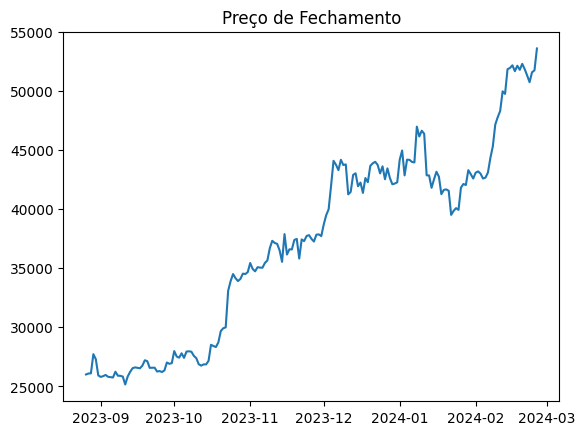

In [10]:
# Plot
plt.plot(dados['Close'])
plt.title('Preço de Fechamento');

### **Função rolling** <br>
A função rolling() é uma função do pandas que permite calcular estatísticas em janelas deslizantes de dados.
Ela é muito útil para calcular médias móveis, desvios padrão, somatórios, mínimos e máximos, entre outras estatísticas.

In [11]:
periodo = 5
dados['Close'].rolling(window=periodo).mean()

Date
2023-08-26             NaN
2023-08-27             NaN
2023-08-28             NaN
2023-08-29             NaN
2023-08-30    26645.792969
                  ...     
2024-02-22    51866.143750
2024-02-23    51588.024219
2024-02-24    51546.415625
2024-02-25    51436.088281
2024-02-26    51784.899219
Name: Close, Length: 185, dtype: float64

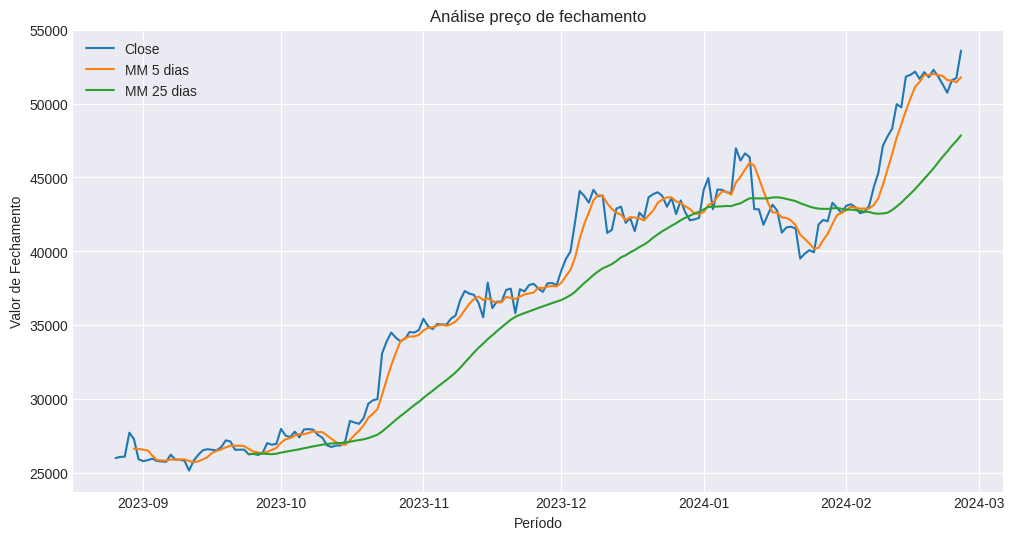

In [12]:
# Plot

# Estilos
plt.style.use('seaborn-darkgrid')

# Tamanho
plt.figure(figsize=(12, 6))

# Plots
plt.plot(dados['Close'])
plt.plot(dados['Close'].rolling(window=periodo).mean())
plt.plot(dados['Close'].rolling(window=periodo+25).mean())

# Legenda
plt.legend(['Close', 'MM 5 dias', 'MM 25 dias'])

# Labels
plt.ylabel('Valor de Fechamento')
plt.xlabel('Período')

plt.title('Análise preço de fechamento');

### **Plotly** <br>
O PLOTLY é uma biblioteca Python de plotagem interativa e de código aberto que oferece suporte a mais de 40 tipos de gráficos exclusivos, abrangendo uma ampla variedade de casos de uso estatísticos, financeiros, geográficos, científicos e tridimensionais. <br> <br>
**plotly.express (px)** é uma maneira rápida e fácil de criar visualizações dinâmicas de dados.
plotly.graph_objects (go) é a API de nível inferior que concede mais controle sobre suas visualizações, mas é mais intensiva em código.

In [13]:
dados.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-08-26,26047.234375,26107.384766,25983.878906,26008.462891,26008.462891,6034817316
2023-08-27,26008.242188,26165.373047,25965.097656,26089.693359,26089.693359,6913768611
2023-08-28,26089.615234,26198.578125,25880.599609,26106.150391,26106.150391,11002805166
2023-08-29,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712
2023-08-30,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235


In [14]:
periodo = 5
dados['Media_Movel'] = dados['Close'].rolling(window=periodo).mean()

dados.head()

,Open,High,Low,Close,Adj Close,Volume,Media_Movel
Date,,,,,,,
2023-08-26,26047.234375,26107.384766,25983.878906,26008.462891,26008.462891,6034817316,NaN
2023-08-27,26008.242188,26165.373047,25965.097656,26089.693359,26089.693359,6913768611,NaN
2023-08-28,26089.615234,26198.578125,25880.599609,26106.150391,26106.150391,11002805166,NaN
2023-08-29,26102.486328,28089.337891,25912.628906,27727.392578,27727.392578,29368391712,NaN
2023-08-30,27726.083984,27760.160156,27069.207031,27297.265625,27297.265625,16343655235,26645.792969


In [15]:
# Express
px.line(dados, y='Close', title='Fechamento')

In [16]:
# Go
figure_02 = go.Figure(
    data=go.Scatter(
        x=dados.index,
        y=dados['Close'],
        line=(dict(color='firebrick', width=3) )
    )
)

figure_02.update_layout(
    title='Análise de Fechamento',
    xaxis_title='Período',
    yaxis_title='Preço de fechamento'
)

figure_02.show()

In [17]:
# Cria um gráfico de área (área preenchida)
area = px.area(
    data_frame=dados.reset_index(),
    y='Close', x='Date',
    title=f'{simbolo}'
)

# Atualiza as configurações dos eixos x (datas) do gráfico
area.update_xaxes(
    title_text='Data',
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1M', step='month', stepmode='backward'),
            dict(count=6, label='6M', step='month', stepmode='backward'),
            dict(count=1, label='1Y', step='year', stepmode='backward'),
            dict(step='all')
        ])
    )
)

# Ajustando o eixo Y
area.update_yaxes(title_text='Price in USD', ticksuffix='$')

# Ajustar o título
area.update_layout(
    showlegend=True,
    title={
        'text': f'{simbolo} ({dados.index.min().year}-Presente)',
        'y': 0.9,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
      },
      template="plotly_white"
    )

area

### **Candlestick Charts** <br>
É um estilo de gráfico financeiro que descreve abertura, alta, baixa e fechamento para uma determinada xcoordenada (tempo mais provável). As caixas representam a dispersão entre os valores opene closee as linhas representam a dispersão entre os valores lowe high. Pontos de amostragem onde o valor de fechamento é maior (inferior) do que o valor de abertura são chamados de crescentes (decrescentes). Por padrão, as velas crescentes são desenhadas em verde, enquanto as decrescentes são desenhadas em vermelho.

In [18]:
# Grafico clandestik
grafico_candlestick = go.Figure(
    data=[
        go.Candlestick(
            x=dados.index,
            open=dados['Open'],
            high=dados['High'],
            low=dados['Low'],
            close=dados['Close'],
            increasing_line_color='cyan',
            decreasing_line_color='gray'
        )
    ]
)

grafico_candlestick.update_layout(
    xaxis_rangeslider_visible=False,
    title='Análise Fechamento',
    xaxis_title='Período',
    yaxis_title='Preço de Fechamento'
)

grafico_candlestick.show()

### **Criando Relátorio**

In [19]:
# Construção do Relatorio
relatorio = make_subplots(
    rows=2,
    cols=1,
    specs=[
        [ {'type':'scatter'} ],
        [ {'type':'scatter'} ],
    ],
    subplot_titles=('Cotação', 'Fechamento'),
    # Compartilhar mesmo eixo x
    shared_xaxes=True,
    # Largura da vertical
    vertical_spacing=0.075

)

# Ajuste do Layout
relatorio.update_layout(
    # Dimensão
    width=1000, height=800,

    # Título no relátorio
    title_text='<b>Data Analytics</b> <br>Cotação do Bitcoin',

    # Estilo
    template='plotly_dark',

    # Ajuste de layout gráficos
    paper_bgcolor='rgb(0, 0, 0)',
    plot_bgcolor='rgb(10, 10, 10)',

    # Fonte do texto
    font=dict(color='white')
)

# Colocando um gráfico na 1 º Linha
relatorio.add_trace(
    go.Candlestick(
        x=dados.index,
        open=dados['Open'],
        high=dados['High'],
        low=dados['Low'],
        close=dados['Close'],
        increasing_line_color='cyan',
        decreasing_line_color='gray'
    ), row=1, col=1
)

# Retirando a barra visivel
relatorio.update_layout(
    xaxis_rangeslider_visible=False
)

# Adicionado um gráfico na 2º Posição
relatorio.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Close'],
        mode='lines',
        name='Fechamento',
        line=dict(color='green')
    ),
    row=2, col=1
)

relatorio.add_trace(
    go.Scatter(
        x=dados.index,
        y=dados['Media_Movel'],
        mode='lines',
        name='Média Móvel',
        line=dict(color='rgb(158, 58, 171)')
    ),
    row=2, col=1
)

# Ajuste
relatorio.update_layout(
    legend=dict(
        # Posição
        orientation='h',

        # Eixo X e Y
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1,
        font=dict( size=9)
    )
)

# Adicionar texto
relatorio.add_annotation(
    # Seta (desativada)
    showarrow=False,
    # Texto
    text='Análise feita no evento de Imersão em Dados',
    # Tamanho
    font=dict(size=12),

    # Aponta as direções do texto
    xref='x domain',
    x=1,
    yref='y domain',
    y=-1.4
)

relatorio.add_annotation(
    showarrow=False,
    text='By: @João Pedro Holanda',
    font=dict(size=12),

     # Aponta as direções do texto
    xref='x domain',
    x=0,
    yref='y domain',
    y=-1.4
)

relatorio

### **Exportando PDF** <br>
**Kaleido** <br>
Kaleido é uma biblioteca de plataforma cruzada para geração de imagens estáticas (por exemplo, png, svg, pdf, etc.) para bibliotecas de visualização baseadas na web, com foco particular na eliminação de dependências externas. O foco inicial do projeto é a exportação de imagens plotly.js do Python para uso por plotly.py, mas ele foi projetado para ser relativamente direto para estender a outras bibliotecas de visualização baseadas na web e outras linguagens de programação. O foco principal do Kaleido (pelo menos inicialmente) é servir como uma dependência de bibliotecas de visualização baseadas na web, como plotly.py. Como tal, o foco está em fornecer uma API programática, em vez de amigável ao usuário.

In [20]:
!pip3 install -U kaleido

In [21]:
relatorio.write_image('Report_Financeiro.pdf')